<a href="https://colab.research.google.com/github/alisha-q/leukemia-detection-labs/blob/main/06_preprocessing_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔧 Leukemia Classification - Preprocessing Pipeline

**Project:** Build image preprocessing functions for model training

**Goal:** Create reusable functions for image preprocessing and data splitting

---
## 1️⃣ Setup: Import Libraries and Download Dataset

In [1]:
# Install required packages
!pip install kagglehub -q

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import cv2
import kagglehub

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


---
## 2️⃣ Download Dataset

In [2]:
# Download dataset
print('📥 Downloading dataset...')
path = kagglehub.dataset_download('andrewmvd/leukemia-classification')

# Set up paths
leukemia_path = os.path.join(path, 'C-NMC_Leukemia')
train_path = os.path.join(leukemia_path, 'training_data')

print(f'✅ Dataset downloaded!')
print(f'📁 Path: {path}')

📥 Downloading dataset...
Using Colab cache for faster access to the 'leukemia-classification' dataset.
✅ Dataset downloaded!
📁 Path: /kaggle/input/leukemia-classification


---
## 3️⃣ Function 1: Resize Images to 224x224

**Why 224x224?**
- Standard input size for transfer learning models (VGG, ResNet, etc.)
- Good balance between detail and computational efficiency

In [3]:
def resize_image(image_path, target_size=(224, 224)):
    """
    Resize an image to target size.

    Args:
        image_path (str): Path to the image file
        target_size (tuple): Target dimensions (width, height)

    Returns:
        numpy.ndarray: Resized image as numpy array
    """
    # Load image
    img = Image.open(image_path)

    # Resize
    img_resized = img.resize(target_size, Image.LANCZOS)

    # Convert to numpy array
    img_array = np.array(img_resized)

    return img_array

# Test the function
fold_0_path = os.path.join(train_path, 'fold_0')
test_img_path = os.path.join(fold_0_path, 'hem', os.listdir(os.path.join(fold_0_path, 'hem'))[0])

original = Image.open(test_img_path)
resized = resize_image(test_img_path)

print(f'✅ Resize function created!')
print(f'Original size: {original.size}')
print(f'Resized size: {resized.shape[:2]}')
print(f'Array shape: {resized.shape}')

✅ Resize function created!
Original size: (450, 450)
Resized size: (224, 224)
Array shape: (224, 224, 3)


---
## 4️⃣ Function 2: Normalize Pixel Values (0-1 Range)

**Why normalize?**
- Neural networks train better with normalized inputs
- Converts pixel values from [0, 255] to [0, 1]

In [4]:
def normalize_image(img_array):
    """
    Normalize pixel values to 0-1 range.

    Args:
        img_array (numpy.ndarray): Image array with values 0-255

    Returns:
        numpy.ndarray: Normalized image with values 0-1
    """
    # Convert to float and divide by 255
    normalized = img_array.astype('float32') / 255.0

    return normalized

# Test the function
test_normalized = normalize_image(resized)

print(f'✅ Normalize function created!')
print(f'Original range: [{resized.min()}, {resized.max()}]')
print(f'Normalized range: [{test_normalized.min():.3f}, {test_normalized.max():.3f}]')
print(f'Data type: {test_normalized.dtype}')

✅ Normalize function created!
Original range: [0, 120]
Normalized range: [0.000, 0.471]
Data type: float32


---
## 5️⃣ Function 3: Complete Preprocessing Pipeline

**Combines:** Resize + Normalize + Convert to Array

In [5]:
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Complete preprocessing: resize, normalize, and convert to array.

    Args:
        image_path (str): Path to the image file
        target_size (tuple): Target dimensions (width, height)

    Returns:
        numpy.ndarray: Preprocessed image ready for model
    """
    # Resize
    img_resized = resize_image(image_path, target_size)

    # Normalize
    img_normalized = normalize_image(img_resized)

    return img_normalized

# Test the function
processed = preprocess_image(test_img_path)

print(f'✅ Preprocessing function created!')
print(f'Output shape: {processed.shape}')
print(f'Value range: [{processed.min():.3f}, {processed.max():.3f}]')
print(f'Data type: {processed.dtype}')

✅ Preprocessing function created!
Output shape: (224, 224, 3)
Value range: [0.000, 0.471]
Data type: float32


---
## 6️⃣ Function 4: Batch Preprocessing

**Process multiple images at once**

In [6]:
def preprocess_batch(image_paths, target_size=(224, 224)):
    """
    Preprocess a batch of images.

    Args:
        image_paths (list): List of image file paths
        target_size (tuple): Target dimensions

    Returns:
        numpy.ndarray: Array of preprocessed images
    """
    processed_images = []

    for img_path in image_paths:
        try:
            img = preprocess_image(img_path, target_size)
            processed_images.append(img)
        except Exception as e:
            print(f'Error processing {img_path}: {e}')

    return np.array(processed_images)

print('✅ Batch preprocessing function created!')

✅ Batch preprocessing function created!


---
## 7️⃣ Function 5: Get All Image Paths with Labels

**Collect all image paths and their corresponding labels**

In [7]:
def get_image_paths_and_labels(data_path, folds=['fold_0', 'fold_1', 'fold_2']):
    """
    Get all image paths and labels from the dataset.

    Args:
        data_path (str): Path to training_data folder
        folds (list): List of fold names to include

    Returns:
        tuple: (image_paths, labels)
            image_paths (list): List of all image file paths
            labels (list): List of labels (0=normal, 1=leukemia)
    """
    image_paths = []
    labels = []

    for fold in folds:
        fold_path = os.path.join(data_path, fold)

        # Normal images (label = 0)
        normal_folder = os.path.join(fold_path, 'hem')
        for img_name in os.listdir(normal_folder):
            image_paths.append(os.path.join(normal_folder, img_name))
            labels.append(0)

        # Leukemia images (label = 1)
        leukemia_folder = os.path.join(fold_path, 'all')
        for img_name in os.listdir(leukemia_folder):
            image_paths.append(os.path.join(leukemia_folder, img_name))
            labels.append(1)

    return image_paths, labels

# Test the function
all_paths, all_labels = get_image_paths_and_labels(train_path)

print(f'✅ Image paths collection function created!')
print(f'Total images: {len(all_paths)}')
print(f'Normal images: {all_labels.count(0)}')
print(f'Leukemia images: {all_labels.count(1)}')

✅ Image paths collection function created!
Total images: 10661
Normal images: 3389
Leukemia images: 7272


---
## 8️⃣ Function 6: Split Dataset (70:15:15)

**Split data into:**
- Training: 70%
- Validation: 15%
- Test: 15%

In [9]:
def split_dataset(image_paths, labels, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_state=42):
    """
    Split dataset into train, validation, and test sets.

    Args:
        image_paths (list): List of image paths
        labels (list): List of labels
        train_ratio (float): Proportion for training (default 0.7)
        val_ratio (float): Proportion for validation (default 0.15)
        test_ratio (float): Proportion for test (default 0.15)
        random_state (int): Random seed for reproducibility

    Returns:
        dict: Dictionary with keys 'train', 'val', 'test'
              Each contains tuple of (paths, labels)
    """
    # Convert to numpy arrays
    X = np.array(image_paths)
    y = np.array(labels)

    # First split: separate test set (15%)
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=random_state, stratify=y
    )

    # Second split: separate train and validation from remaining 85%
    # val_ratio adjusted: 15% of total = 15/85 of remaining
    val_ratio_adjusted = val_ratio / (train_ratio + val_ratio)

    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_ratio_adjusted, random_state=random_state, stratify=y_temp
    )

    return {
        'train': (X_train.tolist(), y_train.tolist()),
        'val': (X_val.tolist(), y_val.tolist()),
        'test': (X_test.tolist(), y_test.tolist())
    }

# Test the function
split_data = split_dataset(all_paths, all_labels)

print(f'✅ Dataset split function created!')
print(f'\n📊 Split Statistics:')
print(f"{'Set':<12} {'Total':<10} {'Normal':<10} {'Leukemia':<10} {'Percentage':<12}")
print('-' * 60)

total_images = len(all_paths)
for set_name in ['train', 'val', 'test']:
    paths, labels = split_data[set_name]
    normal_count = labels.count(0)
    leukemia_count = labels.count(1)
    percentage = (len(paths) / total_images) * 100
    print(f"{set_name.capitalize():<12} {len(paths):<10} {normal_count:<10} {leukemia_count:<10} {percentage:.1f}%")

print('-' * 60)
print(f"{'Total':<12} {total_images:<10} {all_labels.count(0):<10} {all_labels.count(1):<10} 100.0%")

✅ Dataset split function created!

📊 Split Statistics:
Set          Total      Normal     Leukemia   Percentage  
------------------------------------------------------------
Train        7462       2372       5090       70.0%
Val          1599       508        1091       15.0%
Test         1600       509        1091       15.0%
------------------------------------------------------------
Total        10661      3389       7272       100.0%


---
## 9️⃣ Test Preprocessing on 10 Images

**Visualize original vs preprocessed images**

In [10]:
# Get 10 sample images (5 normal + 5 leukemia)
train_paths, train_labels = split_data['train']

# Get 5 normal and 5 leukemia images
normal_samples = [p for p, l in zip(train_paths[:100], train_labels[:100]) if l == 0][:5]
leukemia_samples = [p for p, l in zip(train_paths[:100], train_labels[:100]) if l == 1][:5]

sample_paths = normal_samples + leukemia_samples
sample_labels = [0]*5 + [1]*5

# Preprocess the samples
processed_samples = preprocess_batch(sample_paths)

print(f'✅ Processed {len(processed_samples)} images')
print(f'Batch shape: {processed_samples.shape}')
print(f'Value range: [{processed_samples.min():.3f}, {processed_samples.max():.3f}]')

✅ Processed 10 images
Batch shape: (10, 224, 224, 3)
Value range: [0.000, 0.498]


---
## 🔟 Visualize Original vs Preprocessed

**Compare before and after preprocessing**

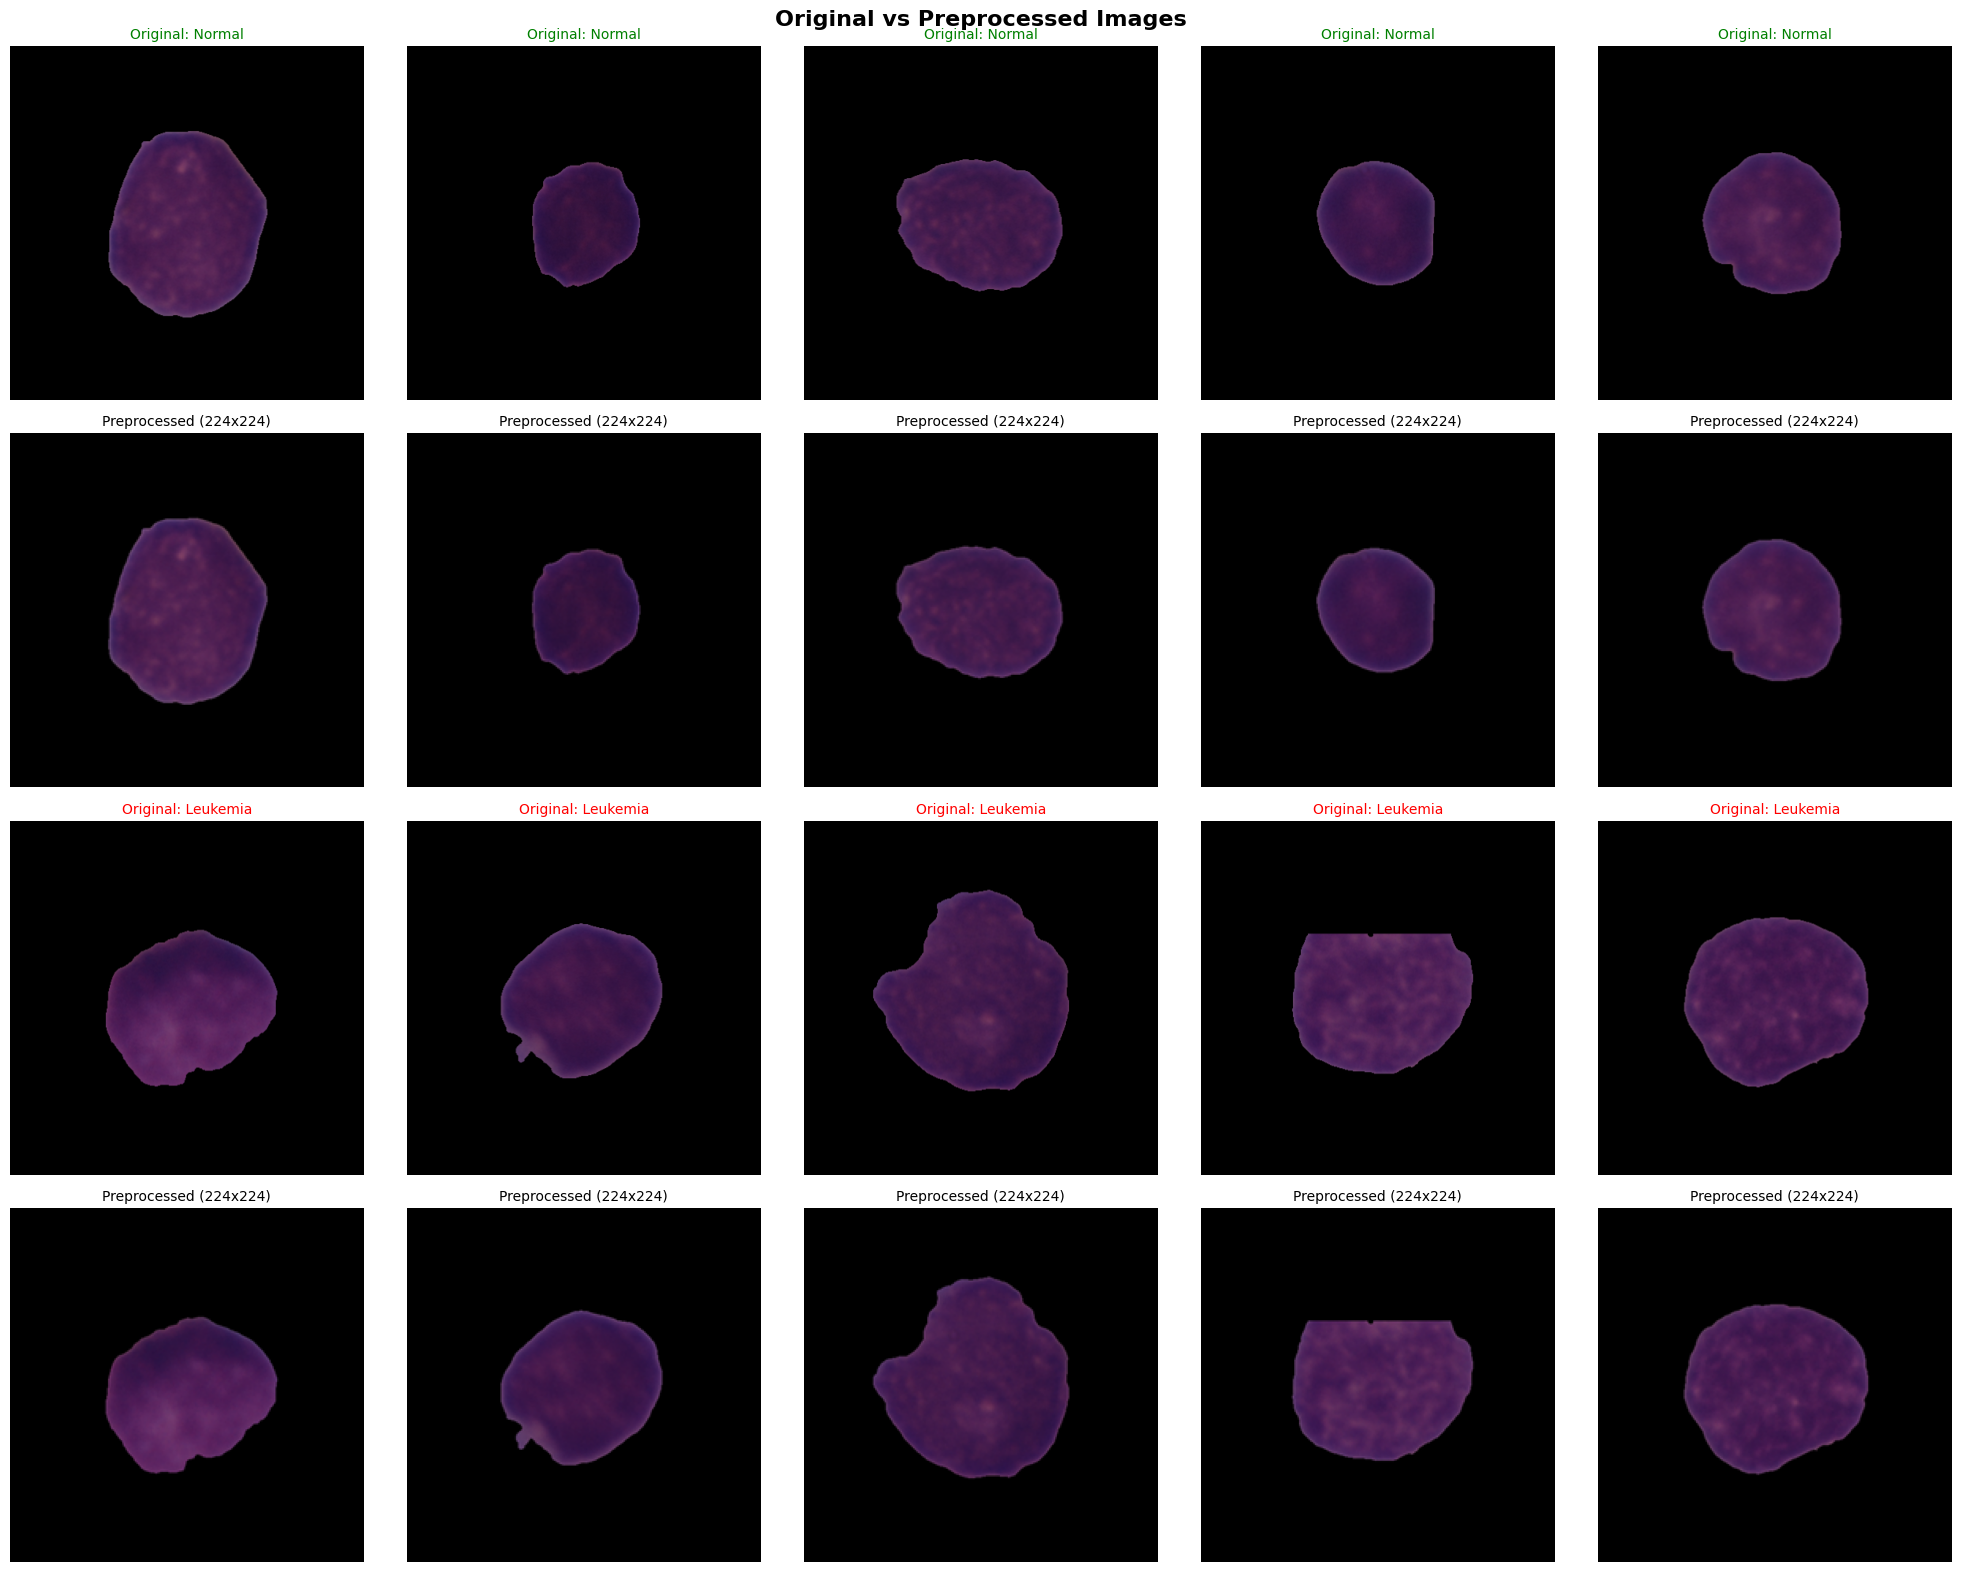

✅ Visualization complete!


In [11]:
# Display original vs preprocessed
fig, axes = plt.subplots(4, 5, figsize=(20, 16))

for i in range(10):
    # Original image
    original = Image.open(sample_paths[i])
    axes[i//5*2, i%5].imshow(original)
    label_text = 'Normal' if sample_labels[i] == 0 else 'Leukemia'
    color = 'green' if sample_labels[i] == 0 else 'red'
    axes[i//5*2, i%5].set_title(f'Original: {label_text}', color=color, fontsize=10)
    axes[i//5*2, i%5].axis('off')

    # Preprocessed image
    axes[i//5*2+1, i%5].imshow(processed_samples[i])
    axes[i//5*2+1, i%5].set_title(f'Preprocessed (224x224)', fontsize=10)
    axes[i//5*2+1, i%5].axis('off')

plt.suptitle('Original vs Preprocessed Images', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print('✅ Visualization complete!')

---
## 1️⃣1️⃣ Summary: All Preprocessing Functions

### ✅ Functions Created:

1. **`resize_image(image_path, target_size=(224, 224))`**
   - Resizes image to target dimensions

2. **`normalize_image(img_array)`**
   - Normalizes pixel values to [0, 1]

3. **`preprocess_image(image_path, target_size=(224, 224))`**
   - Complete preprocessing: resize + normalize

4. **`preprocess_batch(image_paths, target_size=(224, 224))`**
   - Process multiple images at once

5. **`get_image_paths_and_labels(data_path, folds)`**
   - Collect all image paths with labels

6. **`split_dataset(image_paths, labels, train_ratio, val_ratio, test_ratio)`**
   - Split data into train/val/test sets (70:15:15)

---
## 1️⃣2️⃣ Complete Pipeline Test

**Run the entire pipeline end-to-end**

In [12]:
print('🔄 Running Complete Preprocessing Pipeline...\n')

# Step 1: Get all image paths and labels
print('Step 1: Collecting image paths...')
image_paths, labels = get_image_paths_and_labels(train_path)
print(f'   ✅ Found {len(image_paths)} images')

# Step 2: Split dataset
print('\nStep 2: Splitting dataset (70:15:15)...')
data_splits = split_dataset(image_paths, labels)
print(f'   ✅ Train: {len(data_splits["train"][0])} images')
print(f'   ✅ Val: {len(data_splits["val"][0])} images')
print(f'   ✅ Test: {len(data_splits["test"][0])} images')

# Step 3: Preprocess a batch
print('\nStep 3: Preprocessing sample batch...')
sample_batch_paths = data_splits['train'][0][:20]
processed_batch = preprocess_batch(sample_batch_paths)
print(f'   ✅ Processed batch shape: {processed_batch.shape}')
print(f'   ✅ Value range: [{processed_batch.min():.3f}, {processed_batch.max():.3f}]')

print('\n' + '='*60)
print('✅ PREPROCESSING PIPELINE COMPLETE!')
print('='*60)
print('\n📊 Pipeline Summary:')
print(f'   • Total images: {len(image_paths)}')
print(f'   • Target size: 224x224')
print(f'   • Normalization: [0, 1]')
print(f'   • Train/Val/Test: 70/15/15')
print(f'   • Ready for model training! 🚀')

🔄 Running Complete Preprocessing Pipeline...

Step 1: Collecting image paths...
   ✅ Found 10661 images

Step 2: Splitting dataset (70:15:15)...
   ✅ Train: 7462 images
   ✅ Val: 1599 images
   ✅ Test: 1600 images

Step 3: Preprocessing sample batch...
   ✅ Processed batch shape: (20, 224, 224, 3)
   ✅ Value range: [0.000, 0.525]

✅ PREPROCESSING PIPELINE COMPLETE!

📊 Pipeline Summary:
   • Total images: 10661
   • Target size: 224x224
   • Normalization: [0, 1]
   • Train/Val/Test: 70/15/15
   • Ready for model training! 🚀


---
## 1️⃣3️⃣ Save Functions for Reuse

**Save preprocessing functions to a Python file**

In [13]:
# Create preprocessing.py file
preprocessing_code = '''
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split

def resize_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img_resized = img.resize(target_size, Image.LANCZOS)
    return np.array(img_resized)

def normalize_image(img_array):
    return img_array.astype('float32') / 255.0

def preprocess_image(image_path, target_size=(224, 224)):
    img_resized = resize_image(image_path, target_size)
    img_normalized = normalize_image(img_resized)
    return img_normalized

def preprocess_batch(image_paths, target_size=(224, 224)):
    processed_images = []
    for img_path in image_paths:
        try:
            img = preprocess_image(img_path, target_size)
            processed_images.append(img)
        except Exception as e:
            print(f'Error processing {img_path}: {e}')
    return np.array(processed_images)

def get_image_paths_and_labels(data_path, folds=['fold_0', 'fold_1', 'fold_2']):
    image_paths = []
    labels = []
    for fold in folds:
        fold_path = os.path.join(data_path, fold)
        normal_folder = os.path.join(fold_path, 'hem')
        for img_name in os.listdir(normal_folder):
            image_paths.append(os.path.join(normal_folder, img_name))
            labels.append(0)
        leukemia_folder = os.path.join(fold_path, 'all')
        for img_name in os.listdir(leukemia_folder):
            image_paths.append(os.path.join(leukemia_folder, img_name))
            labels.append(1)
    return image_paths, labels

def split_dataset(image_paths, labels, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_state=42):
    X = np.array(image_paths)
    y = np.array(labels)
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=random_state, stratify=y
    )
    val_ratio_adjusted = val_ratio / (train_ratio + val_ratio)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_ratio_adjusted, random_state=random_state, stratify=y_temp
    )
    return {
        'train': (X_train.tolist(), y_train.tolist()),
        'val': (X_val.tolist(), y_val.tolist()),
        'test': (X_test.tolist(), y_test.tolist())
    }
'''

# Save to file
with open('preprocessing.py', 'w') as f:
    f.write(preprocessing_code)

print('✅ Preprocessing functions saved to preprocessing.py')
print('\n💡 You can now import these functions in other notebooks:')
print('   from preprocessing import preprocess_image, split_dataset')

✅ Preprocessing functions saved to preprocessing.py

💡 You can now import these functions in other notebooks:
   from preprocessing import preprocess_image, split_dataset


---
## ✅ Checkpoint Complete!

### What We Accomplished:

1. ✅ **Created resize function** (224x224)
2. ✅ **Created normalize function** (0-1 range)
3. ✅ **Created complete preprocessing pipeline**
4. ✅ **Created batch processing function**
5. ✅ **Created data splitting function** (70:15:15)
6. ✅ **Tested on 10 images**
7. ✅ **Saved functions for reuse**

### 🎯 Next Steps:

- Build CNN model architecture
- Create data generators for efficient training
- Train the model
- Evaluate performance

---

**📝 Remember to save this notebook to GitHub!**

**How to save to GitHub:**
1. File → Download → Download .ipynb
2. Go to your GitHub repository
3. Upload the file
4. Commit with message: "Added preprocessing pipeline notebook"